<a href="https://colab.research.google.com/github/aliciawill/BigData/blob/master/nltk_colab_test_tk_%EC%83%81%ED%92%88%EB%A6%AC%EB%B7%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
import nltk

CPU times: user 653 ms, sys: 229 ms, total: 881 ms
Wall time: 1.53 s


In [2]:
nltk.download('book')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [3]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [4]:
emma_raw = nltk.corpus.gutenberg.raw("austen-emma.txt")
print(emma_raw[:1302])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [5]:
from nltk.tokenize import sent_tokenize 
print(sent_tokenize(emma_raw[:1000])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [6]:
from nltk.tokenize import word_tokenize 
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [7]:
from nltk.tokenize import RegexpTokenizer 
retokenize = RegexpTokenizer("[\w]+") 
retokenize.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

In [8]:
from nltk.stem import PorterStemmer, LancasterStemmer
st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'files', 'flying', 'flew', 'flown']

print('porter stemmer : ', [st1.stem(w) for w in words])
print('lancaster stemmer : ', [st2.stem(w) for w in words])


porter stemmer :  ['fli', 'file', 'fli', 'flew', 'flown']
lancaster stemmer :  ['fly', 'fil', 'fly', 'flew', 'flown']


In [9]:
from nltk.stem import WordNetLemmatizer 
lm = WordNetLemmatizer()
[lm.lemmatize(w, pos = "v") for w in words]

['fly', 'file', 'fly', 'fly', 'fly']

In [10]:
nltk.help.upenn_tagset("VB")

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [11]:
from nltk.tag import pos_tag
sentence = "Emma refused to permit us to obtain the refuse permit" 
tagged_list = pos_tag(word_tokenize(sentence))
tagged_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [12]:
nouns_list = [t[0] for t in tagged_list if t[1] == "NN"] 
nouns_list

['refuse', 'permit']

In [13]:
from nltk.tag import untag
untag(tagged_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [14]:
def tokenizer(doc):
    return ['/'.join(p) for p in tagged_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [15]:
from nltk import Text
text = Text(retokenize.tokenize(emma_raw))

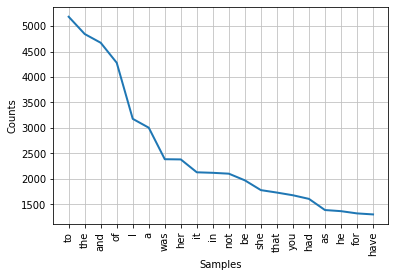

In [16]:
text.plot(20)

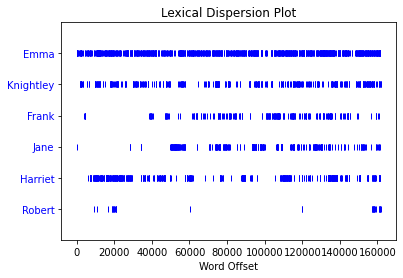

In [17]:
text.dispersion_plot(["Emma", "Knightley", "Frank", "Jane", "Harriet", "Robert"])

In [18]:
text.concordance("Emma")

Displaying 25 of 865 matches:
                                     Emma by Jane Austen 1816 VOLUME I CHAPTER
                                     Emma Woodhouse handsome clever and rich w
f both daughters but particularly of Emma Between _them_ it was more the intim
nd friend very mutually attached and Emma doing just what she liked highly est
 by her own The real evils indeed of Emma s situation were the power of having
ding day of this beloved friend that Emma first sat in mournful thought of any
going only half a mile from them but Emma was aware that great must be the dif
a day It was a melancholy change and Emma could not but sigh over it and wish 
ll the rest of her life at Hartfield Emma smiled and chatted as cheerfully as 
l be able to tell her how we all are Emma spared no exertions to maintain this
or I have a great regard for you and Emma but when it comes to the question of
a fanciful troublesome creature said Emma playfully That is what you have in y
e few people who could

In [19]:
text.similar("Emma")

she it he i harriet you her jane him that me and all they them herself
there but be isabella


In [20]:
text.common_contexts(["Emma", "she"])

but_was and_could that_should said_and which_could whom_knew
which_particularly and_imagined that_could said_i that_began
and_thought do_was but_could than_had said_but manner_was this_could
as_saw possible_could


In [21]:
fd = text.vocab() 
type(fd)

nltk.probability.FreqDist

In [22]:
from nltk import FreqDist
stopwords = ["Mr.", "Mrs.", "Miss", "Mr", "Mrs", "Dear"]
emma_tokens = pos_tag(retokenize.tokenize(emma_raw))
names_list = [t[0] for t in emma_tokens if t[1] == "NNP" and t[0] not in stopwords]
fd_names = FreqDist(names_list)

In [23]:
fd_names.N(), fd_names["Emma"], fd_names.freq("Emma")

(7863, 830, 0.10555767518758744)

In [24]:
fd_names.most_common(5)

[('Emma', 830),
 ('Harriet', 491),
 ('Weston', 439),
 ('Knightley', 389),
 ('Elton', 385)]

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
data = pd.read_csv('yelp.csv', index_col = 0)

In [28]:
data.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
2967245,aMleVK0lQcOSNCs56_gSbg,miHaLnLanDKfZqZHet0uWw,Xp_cWXY5rxDLkX-wqUg-iQ,5,2015-09-30,LOVE the cheeses here. They are worth the pri...,0,0,1
4773684,Hs1f--t9JnVKW9A1U2uhKA,r_RUQSGZcd5bSgmTcS5IfQ,NuGZD3yBVqzpY1HuzT26mQ,5,2015-06-04,This has become our go-to sushi place. The sus...,0,0,0
1139855,i7aiPgNrNaFoM8J_j2OSyQ,zz7lojg6QdZbKFCJiHsj7w,ii8sAGBexBOJoYRFafF9XQ,1,2016-07-03,I was very disappointed with the hotel. The re...,2,1,1
3997153,uft6iMwNQh4I2UDpmbXggA,p_oXN3L9oi8nmmJigf8c9Q,r0j4IpUbcdC1-HfoMYae4w,5,2016-10-15,Love this place - super amazing - staff here i...,0,0,0
4262000,y9QmJ16mrfBZS6Td6Yqo0g,jovtGPaHAqP6XfG9BFwY7A,j6UwIfXrSkGTdVkRu7K6WA,5,2017-03-14,Thank you Dana!!!! Having dyed my hair black p...,0,0,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 2967245 to 838267
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_id    10000 non-null  object
 1   user_id      10000 non-null  object
 2   business_id  10000 non-null  object
 3   stars        10000 non-null  int64 
 4   date         10000 non-null  object
 5   text         10000 non-null  object
 6   useful       10000 non-null  int64 
 7   funny        10000 non-null  int64 
 8   cool         10000 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 781.2+ KB


In [30]:
data.describe()

,stars,useful,funny,cool
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.012800,1.498800,0.464200,0.542500
std,1.724684,6.339355,1.926523,2.010273
min,1.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000,0.000000
max,5.000000,533.000000,83.000000,97.000000


In [31]:
data.drop(['review_id','user_id','business_id','date'], axis = 1, inplace = True)

In [32]:
data['text_length'] =  data['text'].apply(len)

In [33]:
data['stars'].value_counts()

5    7532
1    2468
Name: stars, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


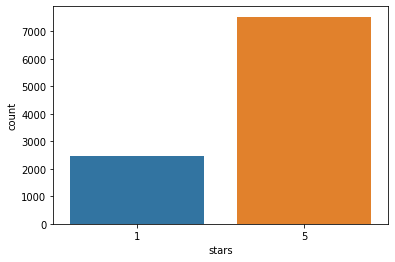

In [34]:
sns.countplot(data['stars'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


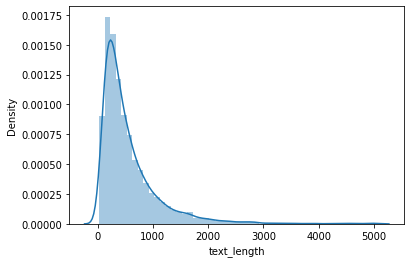

In [35]:
sns.distplot(data['text_length'])

In [36]:
data.corr()

,stars,useful,funny,cool,text_length
stars,1.000000,-0.098825,-0.089860,0.060101,-0.221752
useful,-0.098825,1.000000,0.656630,0.525962,0.161592
funny,-0.089860,0.656630,1.000000,0.741797,0.215003
cool,0.060101,0.525962,0.741797,1.000000,0.193500
text_length,-0.221752,0.161592,0.215003,0.193500,1.000000


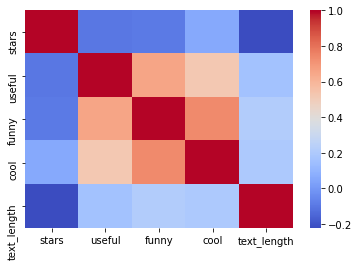

In [37]:
sns.heatmap(data.corr(), cmap = 'coolwarm')

In [38]:
import string

In [39]:
# 펑션으로 만들어보기
def remove_punc(x):
    new_s = []
    for i in x:
        if i not in string.punctuation:
            new_s.append(i)
    new_s = ''.join(new_s)        
    return new_s

In [40]:
data['text'].apply(remove_punc)

2967245    LOVE the cheeses here  They are worth the pric...
4773684    This has become our goto sushi place The sushi...
1139855    I was very disappointed with the hotel The res...
3997153    Love this place  super amazing  staff here is ...
4262000    Thank you Dana Having dyed my hair black previ...
                                 ...                        
1567641    Im a sucker for places like this Get me in fro...
4910763    Extremely rude staff  Was told 4 min on a larg...
1036315    I live in NYC and went to the RTR here in the ...
555962     If you are looking for a trainer then look no ...
838267     Awesome food Awesome beer Awesome service Need...
Name: text, Length: 10000, dtype: object

In [41]:
# List Comprehension으로 만들어보기
data['text'] = data['text'].apply(lambda x: ''.join([i for i in x if i not in string.punctuation]))

In [42]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,LOVE the cheeses here They are worth the pric...,0,0,1,347
4773684,5,This has become our goto sushi place The sushi...,0,0,0,377
1139855,1,I was very disappointed with the hotel The res...,2,1,1,663
3997153,5,Love this place super amazing staff here is ...,0,0,0,141
4262000,5,Thank you Dana Having dyed my hair black previ...,0,0,0,455


In [43]:
from nltk.corpus import stopwords

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
# 펑션으로 만들어보기
def stop_w(x):
    new_s = []
    for i in x.split():
        if i.lower() not in stopwords.words('english'):
            new_s.append(i.lower())
    return new_s

In [46]:
data['text'].apply(stop_w)

2967245    [love, cheeses, worth, price, great, finding, ...
4773684    [become, goto, sushi, place, sushi, always, fr...
1139855    [disappointed, hotel, restaurants, good, booke...
3997153    [love, place, super, amazing, staff, always, f...
4262000    [thank, dana, dyed, hair, black, previously, k...
                                 ...                        
1567641    [im, sucker, places, like, get, front, meat, c...
4910763    [extremely, rude, staff, told, 4, min, large, ...
1036315    [live, nyc, went, rtr, flatiron, didnt, select...
555962     [looking, trainer, look, moment, humberto, met...
838267     [awesome, food, awesome, beer, awesome, servic...
Name: text, Length: 10000, dtype: object

In [47]:
# List Comprehension으로 만들어보기
data['text'] = data['text'].apply(lambda x: [i.lower() for i in x.split() if i.lower() not in stopwords.words('english')])

In [48]:
data.head()

,stars,text,useful,funny,cool,text_length
2967245,5,"[love, cheeses, worth, price, great, finding, ...",0,0,1,347
4773684,5,"[become, goto, sushi, place, sushi, always, fr...",0,0,0,377
1139855,1,"[disappointed, hotel, restaurants, good, booke...",2,1,1,663
3997153,5,"[love, place, super, amazing, staff, always, f...",0,0,0,141
4262000,5,"[thank, dana, dyed, hair, black, previously, k...",0,0,0,455


In [49]:
# 모든 단어를 하나의 리스트로 통합하기
word_split = []

for i in range(len(data)):
    for j in data.iloc[i]['text']:
        word_split.append(j)
    

In [50]:
len(word_split)

542773

In [51]:
from nltk.probability import FreqDist

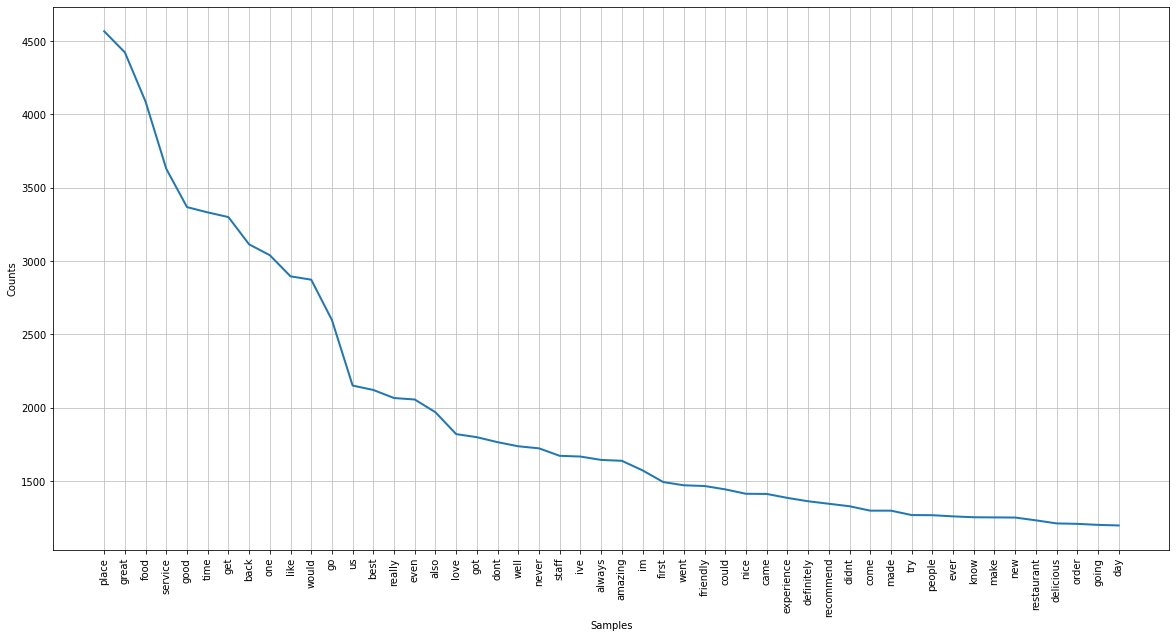

In [52]:
plt.figure(figsize=(20,10))
FreqDist(word_split).plot(50)

In [53]:
from wordcloud import WordCloud

(-0.5, 399.5, 199.5, -0.5)

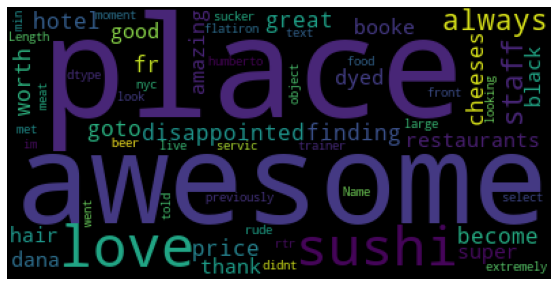

In [54]:
wc = WordCloud().generate(str(data['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')

In [55]:
data['stars'].value_counts()

5    7532
1    2468
Name: stars, dtype: int64

In [56]:
good = data[data['stars'] == 5]['text']
bad = data[data['stars'] == 1]['text']

(-0.5, 399.5, 199.5, -0.5)

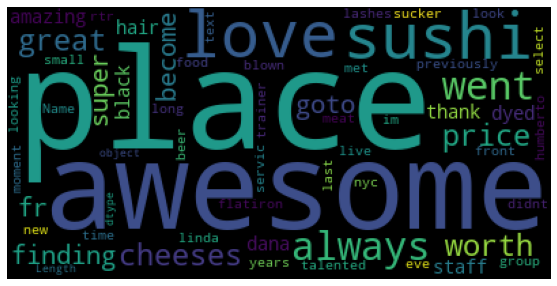

In [57]:
wc = WordCloud().generate(str(good))
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

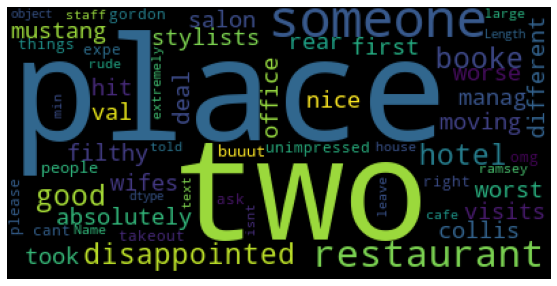

In [58]:
wc = WordCloud().generate(str(bad))
plt.figure(figsize=(10, 5))
plt.imshow(wc)
plt.axis('off')

In [59]:
import pandas as pd
import numpy as np

In [60]:
data = pd.read_csv('yelp.csv', index_col = 0)

In [61]:
X = data['text']
y = data['stars']

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

In [63]:
cv = CountVectorizer()

In [64]:
cv.fit(X)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [65]:
X = cv.transform(X)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [68]:
from sklearn.naive_bayes import MultinomialNB

In [69]:
model = MultinomialNB()

In [70]:
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [71]:
pred = model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [73]:
accuracy_score(y_test, pred)

0.9265

In [74]:
confusion_matrix(y_test, pred)

array([[ 421,   65],
       [  82, 1432]])

In [75]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       0.84      0.87      0.85       486
           5       0.96      0.95      0.95      1514

    accuracy                           0.93      2000
   macro avg       0.90      0.91      0.90      2000
weighted avg       0.93      0.93      0.93      2000



In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf = RandomForestClassifier(max_depth = 10, n_estimators = 1000)

In [78]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
RandomForestClassifier(max_depth=10, n_estimators=1000)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [80]:
pred2 = rf.predict(X_test)

In [81]:
accuracy_score(y_test, pred2)

0.786

In [82]:
confusion_matrix(y_test, pred2)

array([[  62,  424],
       [   4, 1510]])

In [83]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           1       0.94      0.13      0.22       486
           5       0.78      1.00      0.88      1514

    accuracy                           0.79      2000
   macro avg       0.86      0.56      0.55      2000
weighted avg       0.82      0.79      0.72      2000

